In [ ]:
# Importa as bibliotecas necessárias para a exploração do dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importa o dataframe
df = pd.read_csv('/content/agencias.csv')

In [ ]:
# Verifica o formato do dataframe
df.shape

(10, 7)

In [ ]:
# Verifica se há valores nulos no dataframe
df.isnull()

,cod_agencia,nome,endereco,cidade,uf,data_abertura,tipo_agencia
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [ ]:
# Visualiza as 05 primeiras linhas
df.head()

,cod_agencia,nome,endereco,cidade,uf,data_abertura,tipo_agencia
0,7,Agência Digital,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2015-08-01,Digital
1,1,Agência Matriz,"Av. Paulista, 1436 - Cerqueira César, São Paul...",São Paulo,SP,2010-01-01,Física
2,2,Agência Tatuapé,"Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...",São Paulo,SP,2010-06-14,Física
3,3,Agência Campinas,"Av. Francisco Glicério, 895 - Vila Lidia, Camp...",Campinas,SP,2012-03-04,Física
4,4,Agência Osasco,"Av. Antônio Carlos Costa, 1000 - Bela Vista, O...",Osasco,SP,2013-11-06,Física


In [ ]:
# Obtém informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cod_agencia    10 non-null     int64 
 1   nome           10 non-null     object
 2   endereco       10 non-null     object
 3   cidade         10 non-null     object
 4   uf             10 non-null     object
 5   data_abertura  10 non-null     object
 6   tipo_agencia   10 non-null     object
dtypes: int64(1), object(6)
memory usage: 688.0+ bytes


In [ ]:
# Exibe o resumo estatístico do dataframe
df.describe()

,cod_agencia
count,10.00000
mean,5.50000
std,3.02765
min,1.00000
25%,3.25000
50%,5.50000
75%,7.75000
max,10.00000


In [ ]:
# Verifica as agências existentes
df['nome']

0           Agência Digital
1            Agência Matriz
2           Agência Tatuapé
3          Agência Campinas
4            Agência Osasco
5      Agência Porto Alegre
6    Agência Rio de Janeiro
7           Agência Jardins
8     Agência Florianópolis
9            Agência Recife
Name: nome, dtype: object

In [ ]:
# Verifica as cidades onde existem agências
df['cidade'].value_counts()

São Paulo         4
Campinas          1
Osasco            1
Porto Alegre      1
Rio de Janeiro    1
Florianópolis     1
Recife            1
Name: cidade, dtype: int64

In [ ]:
# Verifica as datas de abertura das agências
df['data_abertura']

0    2015-08-01
1    2010-01-01
2    2010-06-14
3    2012-03-04
4    2013-11-06
5    2013-12-01
6    2015-04-01
7    2018-01-09
8    2019-10-09
9    2021-10-09
Name: data_abertura, dtype: object

In [ ]:
# Converte o tipo object para datetime da coluna data_abertura
df['data_abertura'] = pd.to_datetime(df['data_abertura'])

In [ ]:
# Confirma se a alteração do tipo de 'data_abertura' foi concluída
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cod_agencia    10 non-null     int64         
 1   nome           10 non-null     object        
 2   endereco       10 non-null     object        
 3   cidade         10 non-null     object        
 4   uf             10 non-null     object        
 5   data_abertura  10 non-null     datetime64[ns]
 6   tipo_agencia   10 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 688.0+ bytes


In [ ]:
# Verifica os tipos de agências existentes
df['tipo_agencia'].value_counts()

Física     9
Digital    1
Name: tipo_agencia, dtype: int64

In [ ]:
# Verifica o tipo, a data de abertura e a UF das agências
df[['tipo_agencia','cod_agencia','data_abertura', 'uf']]

In [ ]:
# Verifica os estados onde estão as agências
df['uf'].value_counts()

SP    6
RS    1
RJ    1
SC    1
PE    1
Name: uf, dtype: int64

In [ ]:
# Verifica os endereços das agências
df['endereco']

0    Av. Paulista, 1436 - Cerqueira César, São Paul...
1    Av. Paulista, 1436 - Cerqueira César, São Paul...
2    Praça Sílvio Romero, 158 - Tatuapé, São Paulo ...
3    Av. Francisco Glicério, 895 - Vila Lidia, Camp...
4    Av. Antônio Carlos Costa, 1000 - Bela Vista, O...
5    Av. Bento Gonçalves, 1924 - Partenon, Porto Al...
6    R. Sen. Dantas, 15 - Centro, Rio de Janeiro - ...
7    Av. Brg. Faria Lima, 2491 - Jardim Paulistano,...
8    Av. Jorn. Rubéns de Arruda Ramos, 1280 - Centr...
9    Av. Conselheiro Aguiar, 4432 - Boa Viagem, Rec...
Name: endereco, dtype: object

<BarContainer object of 5 artists>

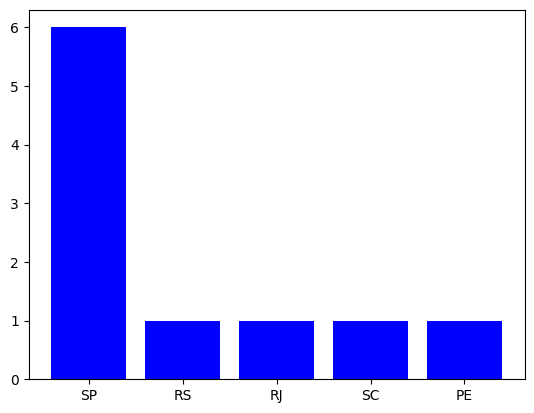

In [ ]:
# Imprime gráfico sobre localização das agências por estado
contagem_agencias = df['uf'].value_counts()
plt.bar(contagem_agencias.index, contagem_agencias.values, color='blue')